<a href="https://colab.research.google.com/github/laurabersani/MLPNS_LBersani/blob/main/Convlutional_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib as mpl
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
#NOTA IMPORTANTE: si può fare load solo perchè precedentemente scaricate le immagini dal notebook https://github.com/laurabersani/MLPNS_LBersani/blob/main/generativeAI/superresolve_aenc_faces.ipynb
imgs = np.load("data/faces_saved.npy")
imgs.shape
#Osservo che la dimensione è già corretta

(1441, 70, 70, 1)

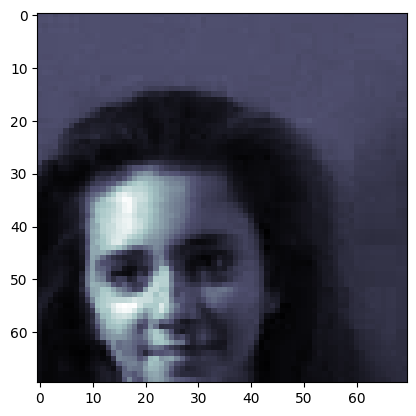

In [6]:
pl.imshow(imgs[10,:,:,0], cmap='bone')

##Costruzione del modello
- Convlutional 64 neuroni (immagine 70x70), con mappa 5x5
- Pooling (con mappa 2x2)
- Layer Conv 32 neuroni 
- Pooling
- Layer Conv 16 neuroni
- Pooling
- Layer conv 32
- pool
- Layer conv 64

In [7]:
layer64 = keras.layers.Conv2D(64, #n di neuroni
                             kernel_size=(5, 5), #dim della mappa di convoluzione 
                             padding="same", 
                             activation="relu", 
                             input_shape=(70, 70, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layermp = keras.layers.MaxPool2D(2)

layer32 = keras.layers.Conv2D(32, 
                             kernel_size=(5, 5),
                             padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))

#layer4 = keras.layers.MaxPool2D(2)

layer16 = keras.layers.Conv2D(16, 
                             kernel_size=(5, 5),
                             padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))

#layer7 = keras.layers.MaxPool2D(2)
layer5=keras.layers.Flatten()

layer6 = keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))



layer7 = keras.layers.Dense(64, activation="softmax")

layer8 = keras.layers.Dense(70*70, activation='sigmoid')

layers=[layer64, layermp, layer32, layermp, layer16, layer5, layer6, layer7, layer8]

model = keras.Sequential(layers)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        51232     
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 16)        12816     
                                                                 
 flatten (Flatten)           (None, 4624)              0         
                                                                 
 dense (Dense)               (None, 32)                148000    
                                                        

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(imgs, imgs, test_size = .20, random_state=1)

In [10]:
#L'output sarà un array, quindi devo appiattire le immagini di output
Ytrain = Ytrain.reshape(len(Ytrain), np.prod(Ytrain.shape[1:]))
Ytest = Ytest.reshape(len(Ytest), np.prod(Ytest.shape[1:]))

In [11]:
Ytrain.shape, Ytest.shape

((1152, 4900), (289, 4900))

In [12]:
model.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])

In [13]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_mae',
                         patience=10,
                         min_delta=0.0001)

In [14]:
history = model.fit( Xtrain, Ytrain, epochs=100000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100000
72/72 [==============================] - 15s 18ms/step - loss: 0.1042 - mae: 0.2473 - acc: 0.0000e+00 - val_loss: 0.0731 - val_mae: 0.2372 - val_acc: 0.0000e+00
Epoch 2/100000
72/72 [==============================] - 1s 8ms/step - loss: 0.0693 - mae: 0.2313 - acc: 8.6806e-04 - val_loss: 0.0640 - val_mae: 0.2218 - val_acc: 0.0000e+00
Epoch 3/100000
72/72 [==============================] - 1s 8ms/step - loss: 0.0617 - mae: 0.2167 - acc: 0.0035 - val_loss: 0.0572 - val_mae: 0.2069 - val_acc: 0.0000e+00
Epoch 4/100000
72/72 [==============================] - 1s 8ms/step - loss: 0.0553 - mae: 0.2024 - acc: 0.0035 - val_loss: 0.0512 - val_mae: 0.1930 - val_acc: 0.0000e+00
Epoch 5/100000
72/72 [==============================] - 1s 7ms/step - loss: 0.0499 - mae: 0.1897 - acc: 0.0035 - val_loss: 0.0463 - val_mae: 0.1808 - val_acc: 0.0000e+00
Epoch 6/100000
72/72 [==============================] - 0s 7ms/step - loss: 0.0456 - mae: 0.1789 - acc: 0.0035 - val_loss: 0.0426 - val_mae:

In [15]:
model.save("data/convlutional32_16_8.h5")

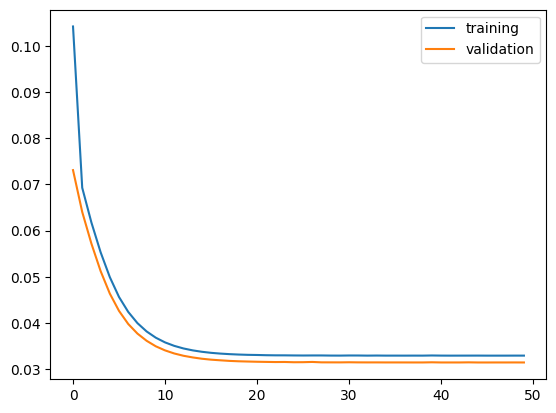

In [16]:
pl.plot(np.array(history.history['loss']), label="training")
pl.plot(np.array(history.history['val_loss']), label="validation")
pl.legend()

è molto liscia. Il che è un bene perchè vuol dire che il learning rate è adeguato, ma anche un male perchè vuol dire che abbiamo spazio per imparare. 

In [17]:
imgsout=model.predict(Xtest)

10/10 [==============================] - 0s 3ms/step


In [18]:
imgsout.shape

(289, 4900)

In [19]:
imgs_o=imgsout.reshape(imgsout.shape[0],70,70)

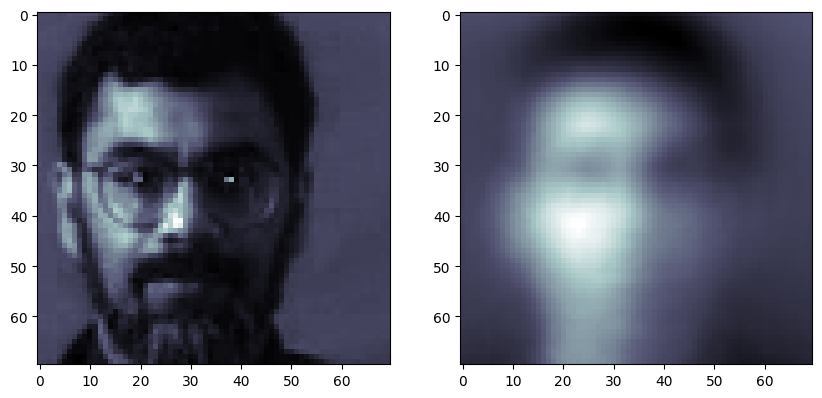

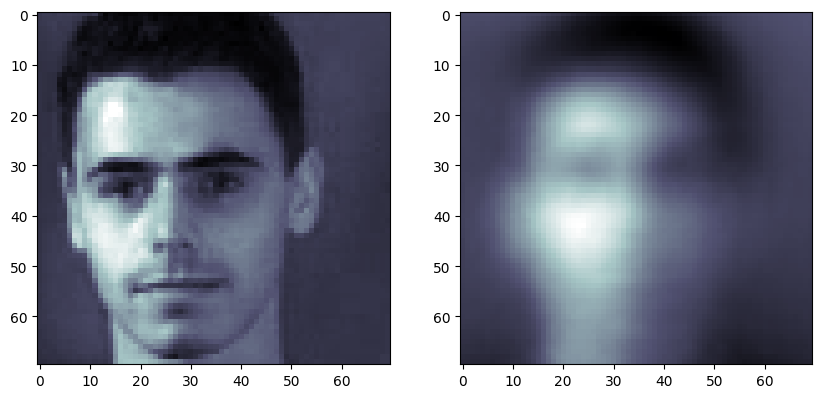

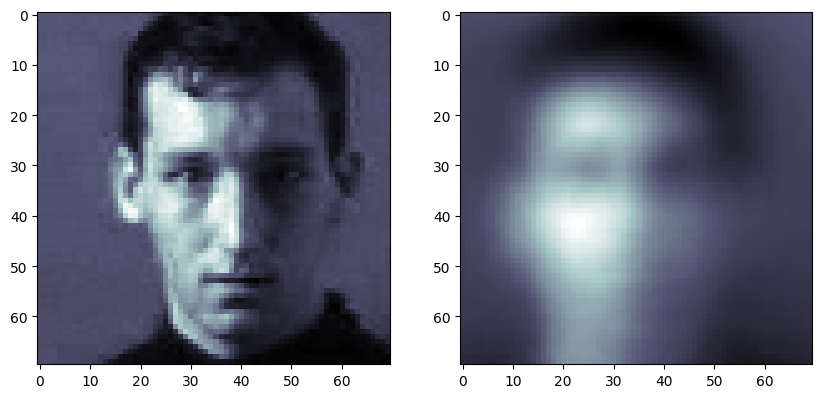

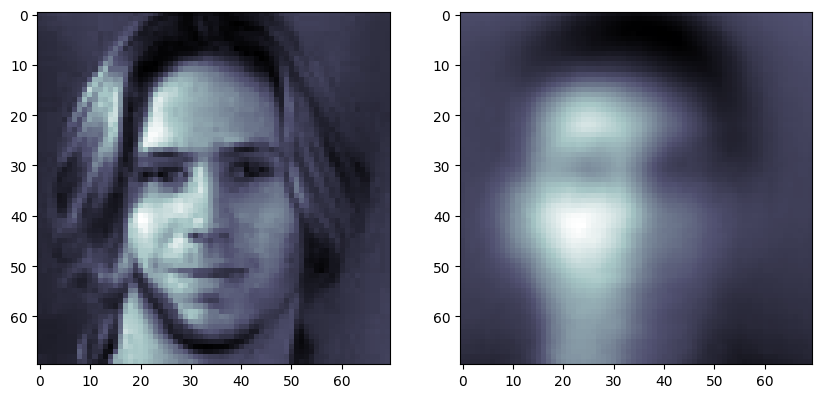

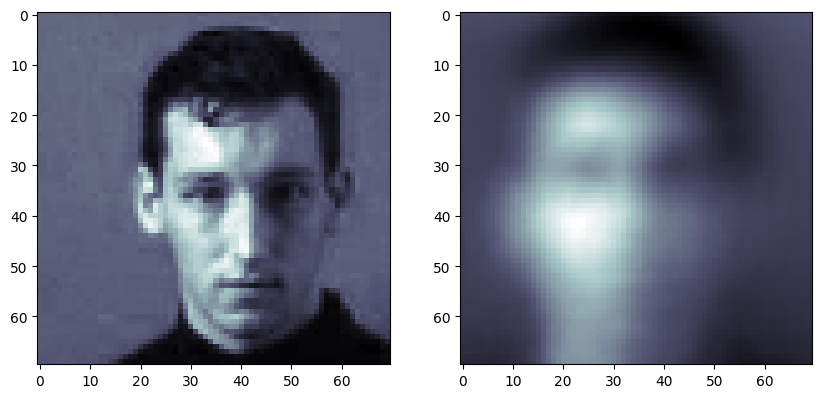

In [20]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(imgs_o[i,:,:], cmap='bone')

Sono venuti tutti uguali! Ad un qualcosa di fumoso che è il valore medio. 
Proviamo a cambiare il learning rate. 

Oppure posso pravare a fare una rete un po' più complessa. 

512-->256-->128-->128-->256-->512

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [46]:
model2 = keras.Sequential()
model2.add(Conv2D(512, kernel_size=(10, 10), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(MaxPooling2D(4))
model2.add(Conv2D(256, kernel_size=(10, 10), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(128, kernel_size=(5, 5), 
                  padding="same", activation="relu", name="bottleneck",
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(Flatten())
model2.add(Dense(256, activation='relu' ))
model2.add(Dense(512, activation='sigmoid'))
model2.add(Dense(70*70, activation='sigmoid'))

In [23]:
model2.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])

In [24]:
history2 = model2.fit( Xtrain, Ytrain, epochs=100000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100000
72/72 [==============================] - 10s 89ms/step - loss: 0.0713 - mae: 0.1420 - acc: 8.6806e-04 - val_loss: 0.0306 - val_mae: 0.1309 - val_acc: 0.0000e+00
Epoch 2/100000
72/72 [==============================] - 6s 82ms/step - loss: 0.0289 - mae: 0.1267 - acc: 0.0017 - val_loss: 0.0258 - val_mae: 0.1192 - val_acc: 0.0000e+00
Epoch 3/100000
72/72 [==============================] - 6s 84ms/step - loss: 0.0251 - mae: 0.1183 - acc: 0.0017 - val_loss: 0.0239 - val_mae: 0.1154 - val_acc: 0.0000e+00
Epoch 4/100000
72/72 [==============================] - 6s 83ms/step - loss: 0.0229 - mae: 0.1125 - acc: 0.0043 - val_loss: 0.0215 - val_mae: 0.1085 - val_acc: 0.0035
Epoch 5/100000
72/72 [==============================] - 6s 84ms/step - loss: 0.0198 - mae: 0.1037 - acc: 0.0000e+00 - val_loss: 0.0187 - val_mae: 0.1005 - val_acc: 0.0000e+00
Epoch 6/100000
72/72 [==============================] - 6s 84ms/step - loss: 0.0177 - mae: 0.0975 - acc: 8.6806e-04 - val_loss: 0.0169 - val

In [25]:
model2.save("data/convlutional256_128_64.h5")

In [26]:
outim2flat=model2.predict(Xtest)

10/10 [==============================] - 1s 18ms/step


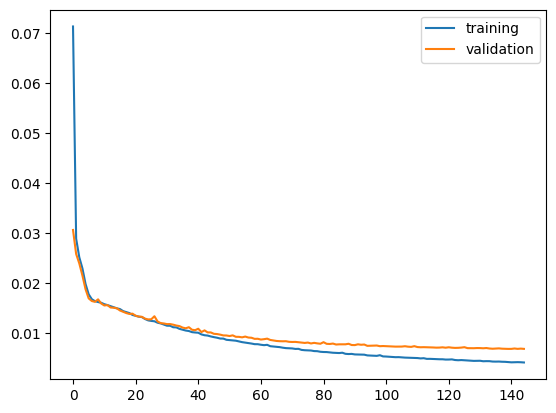

In [27]:
pl.plot(np.array(history2.history['loss']), label="training")
pl.plot(np.array(history2.history['val_loss']), label="validation")
pl.legend()

Sempre molto liscia... 

In [28]:
Outim2flat=model2.predict(Xtest)

10/10 [==============================] - 0s 20ms/step


In [29]:
Outim=Outim2flat.reshape(Outim2flat.shape[0],70, 70)

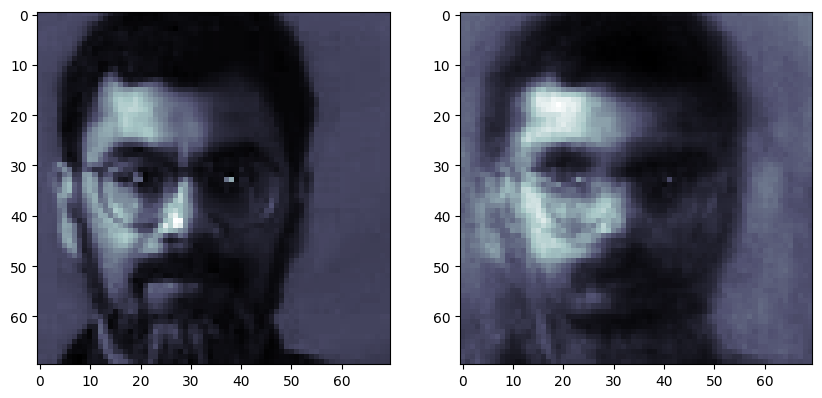

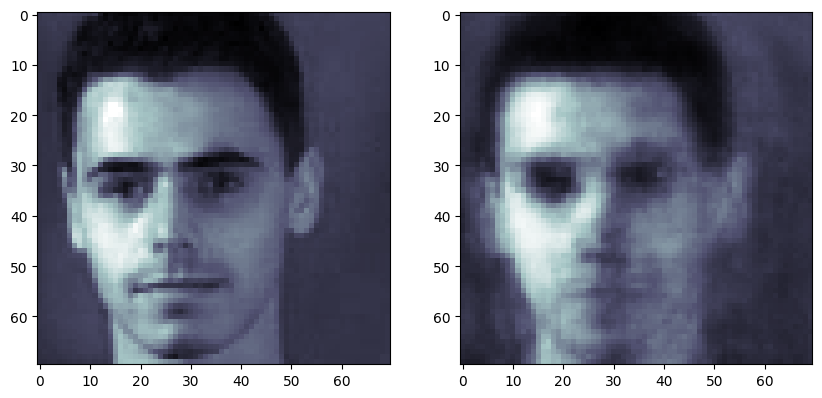

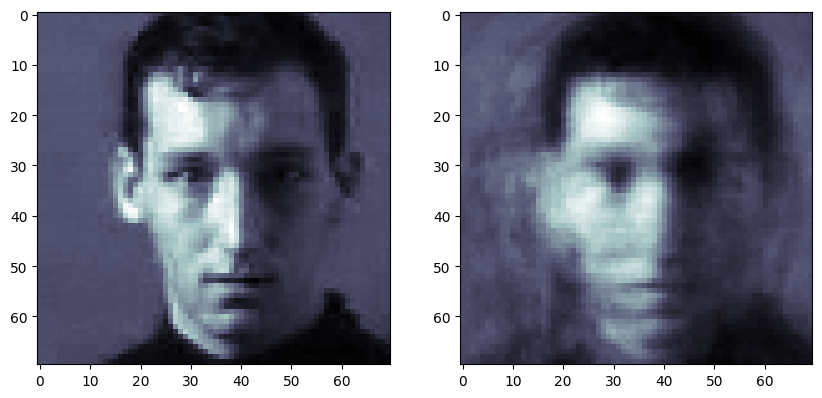

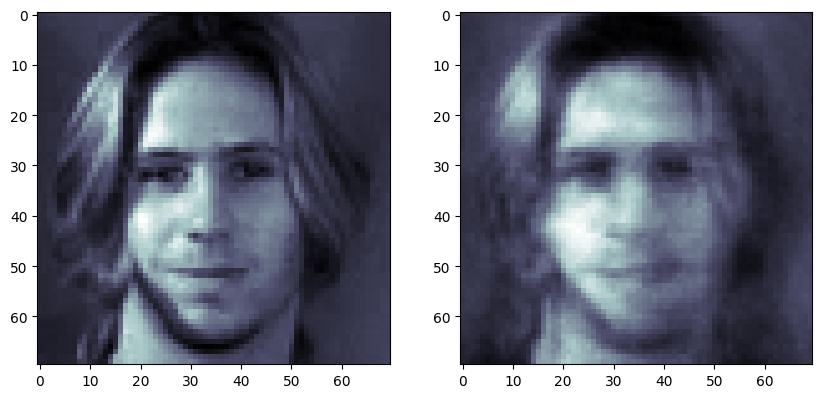

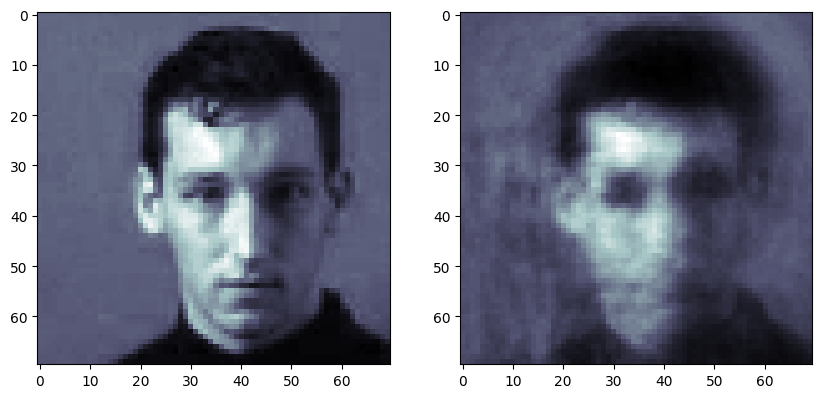

In [30]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(Outim[i,:,:], cmap='bone')

Sembra che con più neuroni si sia risolto il problema. Proviamo ad abbassare il learning rate. 

(Usiamo il secondo modello)

In [31]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_mae',
                         patience=10,
                         min_delta=0.0001)

In [40]:
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='mse', metrics=['mae', 'acc'], optimizer=opt)
history_op = model2.fit( Xtrain, Ytrain, epochs=100, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100
72/72 [==============================] - 9s 92ms/step - loss: 0.0028 - mae: 0.0343 - acc: 0.0686 - val_loss: 0.0066 - val_mae: 0.0500 - val_acc: 0.0208
Epoch 2/100
72/72 [==============================] - 6s 88ms/step - loss: 0.0021 - mae: 0.0294 - acc: 0.0694 - val_loss: 0.0067 - val_mae: 0.0503 - val_acc: 0.0277
Epoch 3/100
72/72 [==============================] - 6s 85ms/step - loss: 0.0021 - mae: 0.0298 - acc: 0.0755 - val_loss: 0.0067 - val_mae: 0.0508 - val_acc: 0.0173
Epoch 4/100
72/72 [==============================] - 6s 85ms/step - loss: 0.0022 - mae: 0.0302 - acc: 0.0781 - val_loss: 0.0067 - val_mae: 0.0507 - val_acc: 0.0208
Epoch 5/100
72/72 [==============================] - 6s 86ms/step - loss: 0.0022 - mae: 0.0305 - acc: 0.0668 - val_loss: 0.0067 - val_mae: 0.0507 - val_acc: 0.0138
Epoch 6/100
72/72 [==============================] - 6s 85ms/step - loss: 0.0022 - mae: 0.0307 - acc: 0.0668 - val_loss: 0.0067 - val_mae: 0.0505 - val_acc: 0.0208
Epoch 7/100
72/7

In [41]:
#from keras import optimizers
#opt = keras.optimizers.Adam(learning_rate=0.001)
#model2.compile(loss="mean_squared_error", optimizer=opt)
#history_op = model2.fit( Xtrain, Ytrain, epochs=5000, 
 #                   validation_data=[Xtest, Ytest],
  #                  batch_size=16, verbose=1,
   #                 callbacks=[callback])

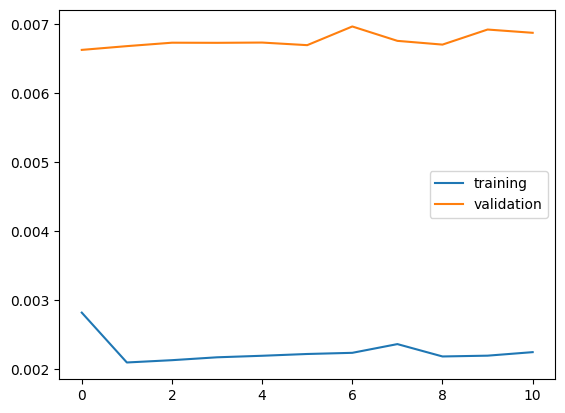

In [42]:
pl.plot(np.array(history_op.history['loss']), label="training")
pl.plot(np.array(history_op.history['val_loss']), label="validation")
pl.legend()

In [43]:
Outim2flat=model2.predict(Xtest)

10/10 [==============================] - 0s 26ms/step


In [44]:
Outim=Outim2flat.reshape(Outim2flat.shape[0],70, 70)

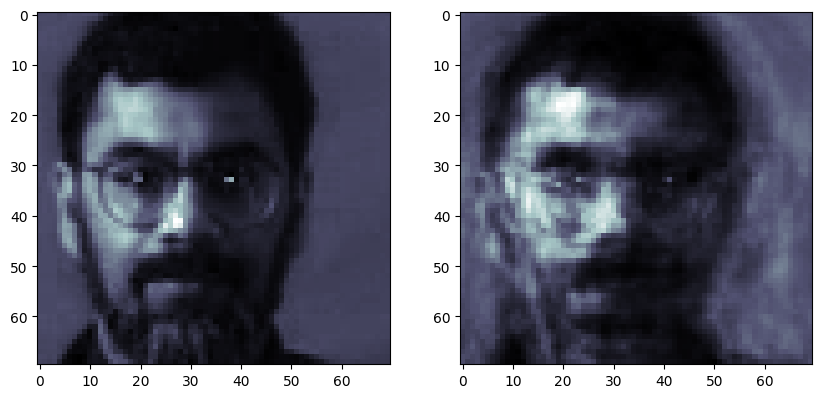

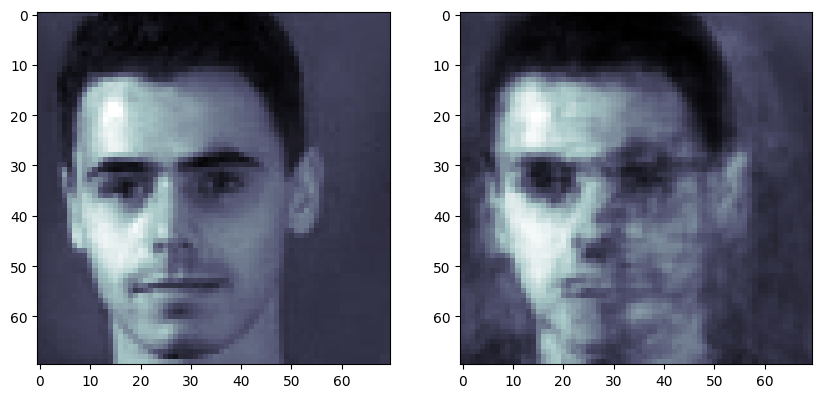

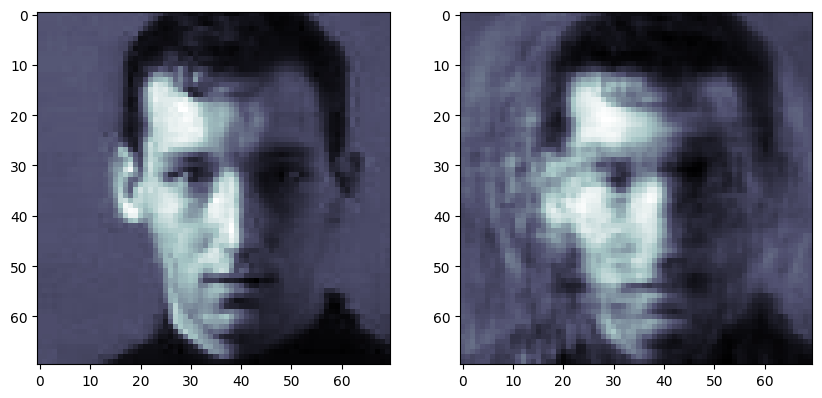

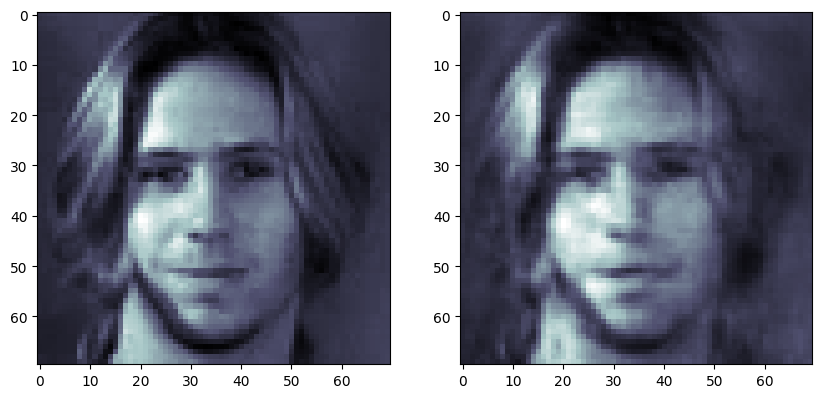

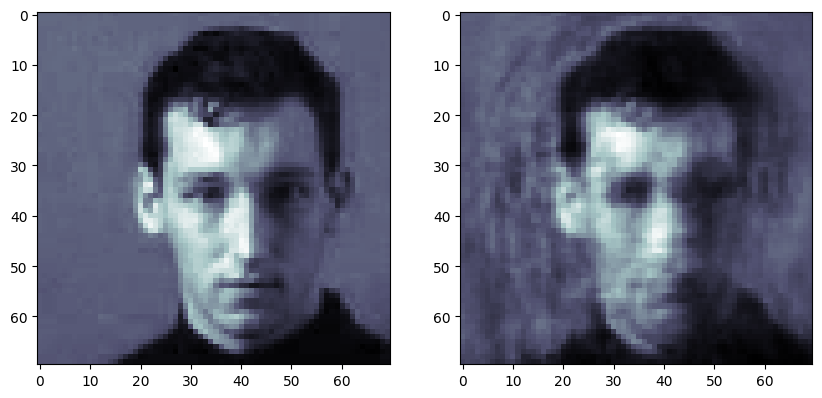

In [45]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(Outim[i,:,:], cmap='bone')

Alcune sono venute peggio, altre meglio...